### Read the data & import required libraries..

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Sales Data.xlsx')

In [3]:
df.head()

,JE Code,Store,Country,Region,Date,Item,Salesperson,List Price,Actual Price,Discount %
0,I-1001,Moscow,Russia,EMEA,2018-10-06,Microwave,"May Wilmot,Russia",80,79,0.0125
1,I-1002,Toronto,Canada,NaN,2015-04-23,Microwave,"David Shiner,Canada",80,54,0.3250
2,I-1003,Sao Paolo,Brazil,LATAM,2017-04-03,Air conditioner,"Gary Reynolds,Brazil",700,686,0.0200
3,I-1004,Istanbul,Turkey,EMEA,2018-08-14,Ceiling fan,"Mark Buntain,Turkey",150,137,0.0867
4,I-1005,Sydney,Australia,APAC,2015-03-03,Toaster,"Christine Davies,Australia",50,37,0.2600


In [4]:
## Upcase sting in pandas.
# df.Salesperson.str.upper()
Salesman = '  May Wilmot,Russia';
Salesman.upper()

'  MAY WILMOT,RUSSIA'

In [5]:
## lowercase sting in pandas.
# df.Salesperson.str.lower()
Salesman.lower()

'  may wilmot,russia'

In [6]:
## Title sting in pandas.
# df.Salesperson.str.title()
Salesman.title()

'  May Wilmot,Russia'

In [7]:
## Find length of the string.
len(Salesman)
# df.Salesperson.str.len()

19

In [10]:
### Return the location of String.
stripped = Salesman.strip()
loc = stripped.find(",")
# loc = df.Salesperson.str.find(",")
# loc
loc

10

### Segreagate Name and country from the String.

In [12]:
def strings(x):
    stripped = x.strip()
    loc = stripped.find(",")
    First_name = stripped[:loc]
    Country = stripped[loc+1:]
    return pd.Series([First_name, Country])

df[['Name','Country1']] = df.Salesperson.apply(strings)

df.head()
# df.Salesperson.apply(strings)

,JE Code,Store,Country,Region,Date,Item,Salesperson,List Price,Actual Price,Discount %,Name,Country1
0,I-1001,Moscow,Russia,EMEA,2018-10-06,Microwave,"May Wilmot,Russia",80,79,0.0125,May Wilmot,Russia
1,I-1002,Toronto,Canada,NaN,2015-04-23,Microwave,"David Shiner,Canada",80,54,0.3250,David Shiner,Canada
2,I-1003,Sao Paolo,Brazil,LATAM,2017-04-03,Air conditioner,"Gary Reynolds,Brazil",700,686,0.0200,Gary Reynolds,Brazil
3,I-1004,Istanbul,Turkey,EMEA,2018-08-14,Ceiling fan,"Mark Buntain,Turkey",150,137,0.0867,Mark Buntain,Turkey
4,I-1005,Sydney,Australia,APAC,2015-03-03,Toaster,"Christine Davies,Australia",50,37,0.2600,Christine Davies,Australia


### String functions in Python..
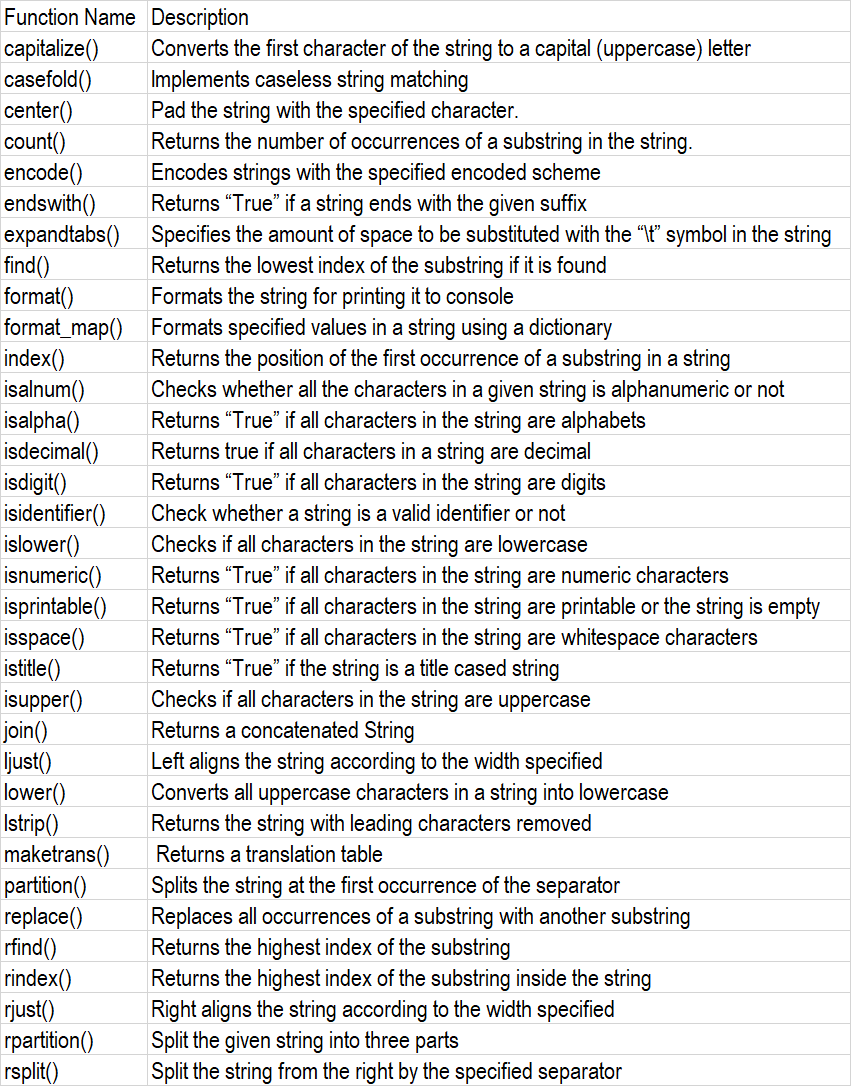

In [77]:
df.head()

,JE Code,Store,Country,Region,Date,Item,Salesperson,List Price,Actual Price,Discount %,Name
0,I-1001,Moscow,Russia,EMEA,2018-10-06,Microwave,"May Wilmot,Russia",80,79,0.0125,May Wilmot
1,I-1002,Toronto,Canada,NaN,2015-04-23,Microwave,"David Shiner,Canada",80,54,0.3250,David Shiner
2,I-1003,Sao Paolo,Brazil,LATAM,2017-04-03,Air conditioner,"Gary Reynolds,Brazil",700,686,0.0200,Gary Reynolds
3,I-1004,Istanbul,Turkey,EMEA,2018-08-14,Ceiling fan,"Mark Buntain,Turkey",150,137,0.0867,Mark Buntain
4,I-1005,Sydney,Australia,APAC,2015-03-03,Toaster,"Christine Davies,Australia",50,37,0.2600,Christine Davies


In [13]:
%%timeit
df.Store.apply(lambda x : x.lower()).head()

338 µs ± 50.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
df.Store.str.lower()

208 µs ± 7.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Calculate total sale per item and sort it from highest to lowest..

In [80]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

In [81]:
chipo['item_price_int'] =  chipo.item_price.apply(lambda x : x[1:]).astype('float')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_int
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [82]:
chipo['Total'] = chipo.quantity*chipo.item_price_int

In [83]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   item_price_int      4622 non-null   float64
 6   Total               4622 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 252.9+ KB


In [84]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_int,Total
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,33.96


In [85]:
chipo.groupby('item_name').sum()['Total'].sort_values()

item_name
Chips and Mild Fresh Tomato Salsa           3.00
Veggie Crispy Tacos                         8.49
Carnitas Salad                              8.99
Crispy Tacos                               14.80
Salad                                      14.80
Steak Salad                                35.66
Chips and Roasted Chili-Corn Salsa         43.02
Burrito                                    44.40
Veggie Salad                               50.94
Carnitas Salad Bowl                        66.34
Izze                                       67.80
Chips and Roasted Chili Corn Salsa         73.75
Bowl                                       74.00
Chicken Salad                              81.09
Chips and Tomatillo-Green Chili Salsa      88.43
Veggie Soft Tacos                          90.94
Chips and Tomatillo-Red Chili Salsa        93.21
Carnitas Crispy Tacos                      95.94
Barbacoa Salad Bowl                       106.40
Nantucket Nectar                          111.87
Barbacoa C